<a href="https://colab.research.google.com/github/RushN23/Moving-Average-Crossoveer-Strategy/blob/main/ACM_R2_RIshabh_Nanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing relevent libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pandas_ta
import pandas_ta as ta
plt.style.use("fivethirtyeight")
import yfinance as yf
import datetime as dt

In [ ]:
#Adding date limits for the data
endd = dt.datetime.now().strftime('%Y-%m-%d')
startd = (dt.datetime.now() - dt.timedelta(days=5*365)).strftime('%Y-%m-%d')
nifty50= yf.download("^NSEI", start=startd, end= endd )
nifty50

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,10640.950195,345400
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,10604.349609,291500
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,10735.450195,289200
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,10789.849609,279600
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,10791.650391,396800
...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,21717.949219,491100
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,21782.500000,349200
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,21616.050781,287400


In [ ]:
#preprocessing the data by interpolating the data to get information for the weekend trades
df_in=nifty50.interpolate(method='linear',axis=0)
df_in

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,10640.950195,345400
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,10604.349609,291500
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,10735.450195,289200
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,10789.849609,279600
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,10791.650391,396800
...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,21717.949219,491100
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,21782.500000,349200
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,21616.050781,287400


Text(0.5, 1.0, 'Close price')

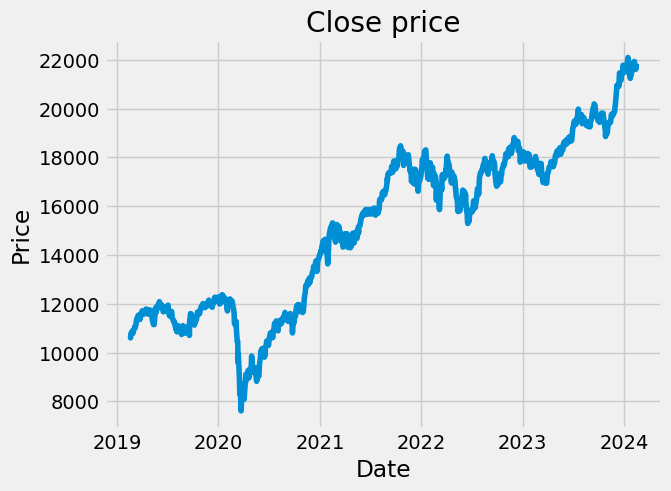

In [ ]:
plt.plot(df_in['Close'])
plt.xlabel('Date')
plt.ylabel("Price")
plt.title("Close price")


In [ ]:
#removing redundant columns
df=nifty50.drop(['Adj Close', 'Volume'], axis=1)
df

,Open,High,Low,Close
Date,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391
...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781


In [ ]:
# defining bollinger bands for volatility
def BBand(data,lookback,n_std):
  h_avg=(data.High + data.Low + data.Close)/3
  mean=h_avg.rolling(lookback).mean()
  std=h_avg.rolling(lookback).std()
  upper=mean + std * n_std
  lower=mean - std * n_std
  return upper, lower


In [ ]:
df['BBup'],df['BBlow']= BBand(df,20,2)
df

,Open,High,Low,Close,BBup,BBlow
Date,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,NaN,NaN
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,NaN,NaN
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,NaN,NaN
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,NaN,NaN
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,NaN,NaN
...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,22129.857849,21268.090588
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,22134.259662,21280.610455
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,22134.788688,21281.916455


<Figure size 600x1800 with 0 Axes>

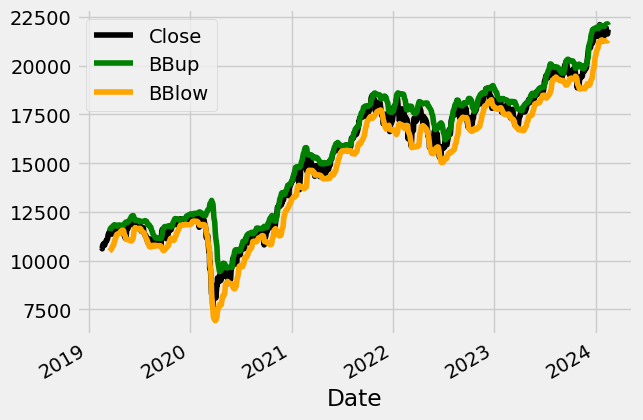

In [ ]:
plt.figure(figsize=(6,18))
ax=df[['Close','BBup','BBlow']].plot(color=['black','green','orange'])
ax.fill_between(df.index,df['BBup'],df['BBlow'],facecolor='orange',alpha=0.1)
plt.show()

In [ ]:
#Calculating daily and log returns
df["Daily Return"]=df["Close"].pct_change()*100
df

,Open,High,Low,Close,BBup,BBlow,Daily Return
Date,,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,NaN,NaN,NaN
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,NaN,NaN,-0.343960
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,NaN,NaN,1.236291
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,NaN,NaN,0.506727
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,NaN,NaN,0.016690
...,...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,22129.857849,21268.090588,-0.969202
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,22134.259662,21280.610455,0.297223
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,22134.788688,21281.916455,-0.764142


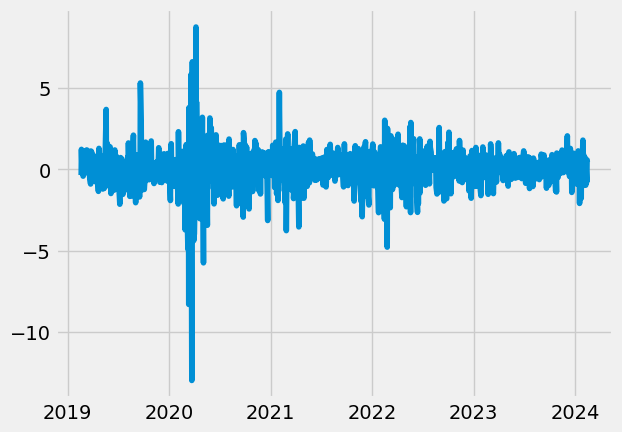

80.97315965043002


In [ ]:
plt.plot(df["Daily Return"])
plt.show()
print(df["Daily Return"].sum())

In [ ]:
df["Log return"]=np.log(1+df["Daily Return"])
df

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,BBup,BBlow,Daily Return,Log return
Date,,,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,NaN,NaN,NaN,NaN
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,NaN,NaN,-0.343960,-0.421533
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,NaN,NaN,1.236291,0.804819
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,NaN,NaN,0.506727,0.409940
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,NaN,NaN,0.016690,0.016552
...,...,...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,22129.857849,21268.090588,-0.969202,-3.480296
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,22134.259662,21280.610455,0.297223,0.260226
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,22134.788688,21281.916455,-0.764142,-1.444525


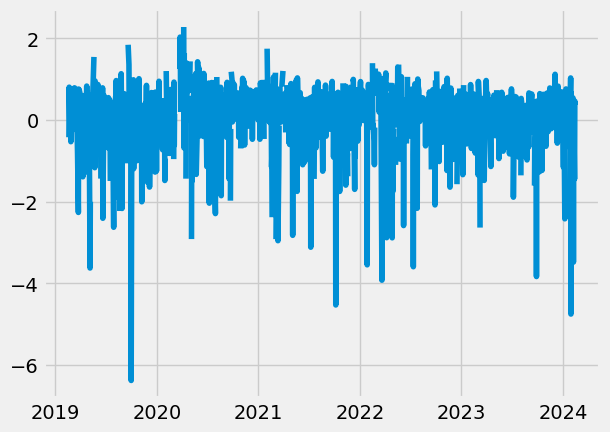

In [ ]:
plt.plot(df["Log return"])
#plt.plot(df["Close"])
plt.show()

In [ ]:
#gathering 50 Ma and 200 Ma data from pandas_ta library(also did using rolling method for backtestng)
df["50MA"]=df.ta.sma(length=50)
df["200MA"]=df.ta.sma(length=200)
df


,Open,High,Low,Close,BBup,BBlow,Daily Return,Log return,50MA,200MA,Signal,Position,Buy,Sell
Date,,,,,,,,,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,NaN,NaN,-0.343960,-0.421533,NaN,NaN,0,0.0,NaN,NaN
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,NaN,NaN,1.236291,0.804819,NaN,NaN,0,0.0,NaN,NaN
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,NaN,NaN,0.506727,0.409940,NaN,NaN,0,0.0,NaN,NaN
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,NaN,NaN,0.016690,0.016552,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,22129.857849,21268.090588,-0.969202,-3.480296,21373.397930,19727.410791,1,0.0,NaN,NaN
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,22134.259662,21280.610455,0.297223,0.260226,21411.253945,19748.201045,1,0.0,NaN,NaN
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,22134.788688,21281.916455,-0.764142,-1.444525,21441.642969,19768.161045,1,0.0,NaN,NaN


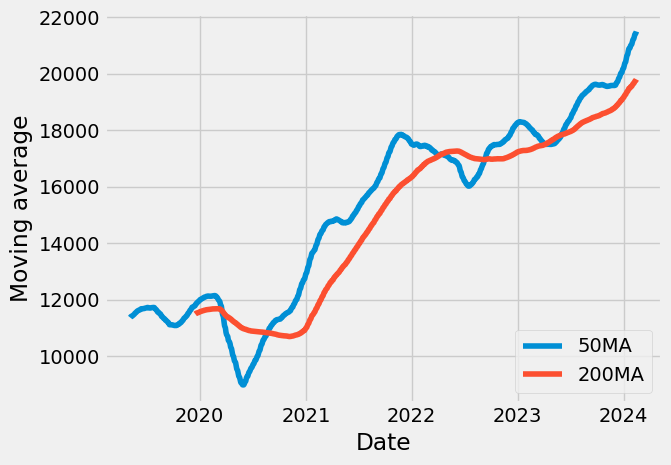

In [ ]:
#plotting the graph
plt.plot(df["50MA"])
plt.plot(df["200MA"])
plt.legend(["50MA", "200MA"], loc="lower right")
plt.xlabel("Date")
plt.ylabel("Moving average")
plt.show()

In [ ]:
#coding the crossover strategy
def crossover(df):
 df["Signal"]=np.where(df["50MA"]>df["200MA"],1,0)
 df["Position"]=df["Signal"].diff()
 df['Buy']= np.where(df['Position']==1,df['Close'],np.NAN)
 df['Sell']=np.where(df['Position']==-1,df['Close'],np.NAN)
 return df
crossover(df)

,Open,High,Low,Close,BBup,BBlow,Daily Return,Log return,50MA,200MA,Signal,Position,Buy,Sell
Date,,,,,,,,,,,,,,
2019-02-18,10738.650391,10759.900391,10628.400391,10640.950195,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2019-02-19,10636.700195,10722.849609,10585.650391,10604.349609,NaN,NaN,-0.343960,-0.421533,NaN,NaN,0,0.0,NaN,NaN
2019-02-20,10655.450195,10752.700195,10646.400391,10735.450195,NaN,NaN,1.236291,0.804819,NaN,NaN,0,0.0,NaN,NaN
2019-02-21,10744.099609,10808.849609,10721.500000,10789.849609,NaN,NaN,0.506727,0.409940,NaN,NaN,0,0.0,NaN,NaN
2019-02-22,10782.700195,10801.549805,10758.400391,10791.650391,NaN,NaN,0.016690,0.016552,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,22009.650391,22011.050781,21665.300781,21717.949219,22129.857849,21268.090588,-0.969202,-3.480296,21373.397930,19727.410791,1,0.0,NaN,NaN
2024-02-09,21727.000000,21804.449219,21629.900391,21782.500000,22134.259662,21280.610455,0.297223,0.260226,21411.253945,19748.201045,1,0.0,NaN,NaN
2024-02-12,21800.800781,21831.699219,21574.750000,21616.050781,22134.788688,21281.916455,-0.764142,-1.444525,21441.642969,19768.161045,1,0.0,NaN,NaN


Text(0, 0.5, 'Close Price')

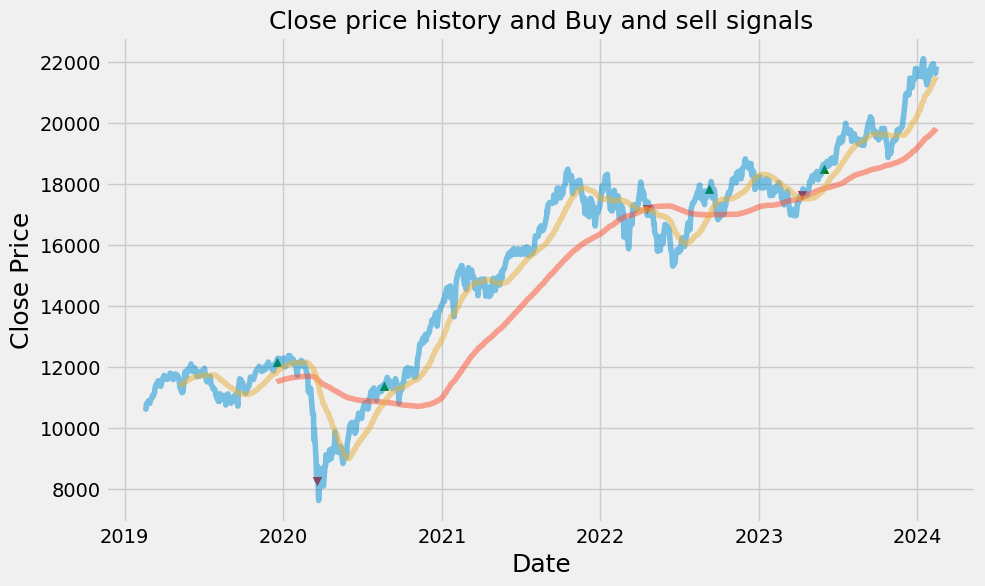

In [ ]:
#Graphing the strategy and highlighting the signals
plt.figure(figsize=(10,6))
plt.title("Close price history and Buy and sell signals", fontsize=18)
plt.plot(df["Close"], alpha=0.5, label="Close")
plt.plot(df["200MA"], alpha=0.5, label="200SMA")
plt.plot(df["50MA"], alpha=0.5, label="50SMA")
plt.scatter(df.index,df["Buy"],alpha=1,label="Buy Signal", marker='^', color="Green")
plt.scatter(df.index,df["Sell"],alpha=1,label="Sell Signal", marker='v', color="Red")



plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)


STARTING BACKTESTING WITH NIFTY50 EARLIER DATA

In [ ]:
import pandas_datareader as pdr

In [ ]:
#variables
slowma=200
fastma=50
period=200
starting_balance=1000000

In [ ]:
#time
start=dt.datetime(2010,1,1)
end=dt.datetime(2015,1,1)
years=(end-start).days/365.25


In [ ]:
# downloading test data
price=yf.download("^NSEI", start=start, end= end )
price.head()
price=price.drop(['Adj Close', 'Volume'], axis=1)
price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000
...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805


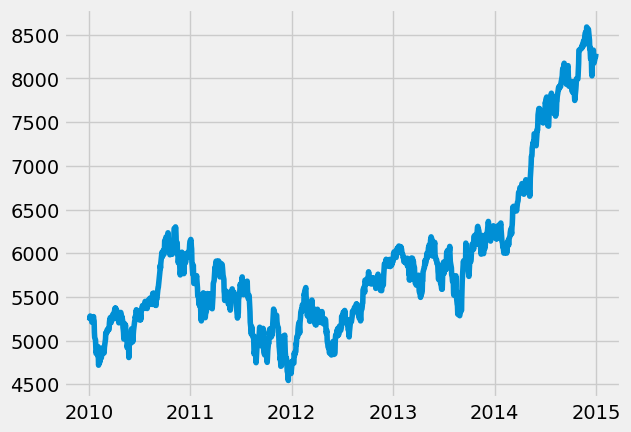

In [ ]:
#plot chart
plt.plot(price.Close)
plt.show()

In [ ]:
#daily return and benchmark parameters
price['Return']= price.Close/price.Open
price['Bench_Bal']= starting_balance * price.Return.cumprod()
price

,Open,High,Low,Close,Return,Bench_Bal
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,1.006018,1.006018e+06
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,1.000142,1.006161e+06
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,1.000692,1.006857e+06
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.996460,1.003292e+06
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.996296,9.995759e+05
...,...,...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098,0.988159,5.723670e+05
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195,0.999500,5.720810e+05
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,1.003847,5.742817e+05


In [ ]:
#overall and  annual  return
bench_return=round(((price.Bench_Bal[-1]/price.Bench_Bal[0])-1)*100,2)
bench_cagr=round((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/years))-1)*100,2)
print(bench_return)
print(bench_cagr)

-42.73
-10.55


In [ ]:
#max drawdowns
price["Bench_peak"]=price.Bench_Bal.cummax()
price["Bench_DD"]=price['Bench_Bal']--price['Bench_peak']
drawdown= round((((price['Bench_DD']/price['Bench_peak']).min())*100),2)
print(drawdown)

147.79


In [ ]:
#calculate moving averages for test data
price['fastma']=price.Close.rolling(window=fastma).mean()
price['slowma']=price.Close.rolling(window=slowma).mean()
price=price.drop(['Bench_peak','Bench_DD'],axis=1)
price

,Open,High,Low,Close,Return,Bench_Bal,fastma,slowma
Date,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,1.006018,1.006018e+06,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,1.000142,1.006161e+06,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,1.000692,1.006857e+06,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.996460,1.003292e+06,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.996296,9.995759e+05,NaN,NaN
...,...,...,...,...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098,0.988159,5.723670e+05,8256.941064,7571.597761
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195,0.999500,5.720810e+05,8261.744072,7581.670762
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,1.003847,5.742817e+05,8269.471064,7591.902012


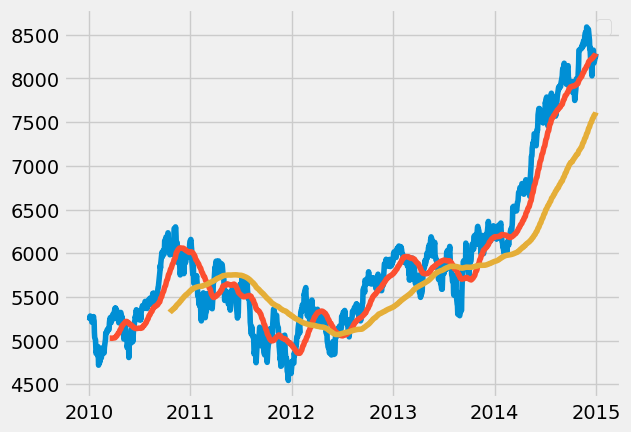

In [ ]:
#plotting the graph
plt.plot(price.Close)
plt.plot(price.fastma)
plt.plot(price.slowma)

plt.legend()
plt.show()

In [ ]:
#Setting up entries
price['Long']= price.fastma>price.slowma
price

,Open,High,Low,Close,Return,Bench_Bal,fastma,slowma,Long
Date,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,1.006018,1.006018e+06,NaN,NaN,False
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,1.000142,1.006161e+06,NaN,NaN,False
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,1.000692,1.006857e+06,NaN,NaN,False
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.996460,1.003292e+06,NaN,NaN,False
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.996296,9.995759e+05,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098,0.988159,5.723670e+05,8256.941064,7571.597761,True
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195,0.999500,5.720810e+05,8261.744072,7581.670762,True
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,1.003847,5.742817e+05,8269.471064,7591.902012,True


In [ ]:
#get system return
price["sys_return"]=np.where(price.Long.shift(1)==True, price.Return,1)
price

,Open,High,Low,Close,Return,Bench_Bal,fastma,slowma,Long,sys_return
Date,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,1.006018,1.006018e+06,NaN,NaN,False,1.000000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,1.000142,1.006161e+06,NaN,NaN,False,1.000000
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,1.000692,1.006857e+06,NaN,NaN,False,1.000000
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.996460,1.003292e+06,NaN,NaN,False,1.000000
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.996296,9.995759e+05,NaN,NaN,False,1.000000
...,...,...,...,...,...,...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098,0.988159,5.723670e+05,8256.941064,7571.597761,True,0.988159
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195,0.999500,5.720810e+05,8261.744072,7581.670762,True,0.999500
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,1.003847,5.742817e+05,8269.471064,7591.902012,True,1.003847


In [ ]:
#Calculating system balance
price['sys_bal']= starting_balance * price.sys_return.cumprod()
price

,Open,High,Low,Close,Return,Bench_Bal,fastma,slowma,Long,sys_return,sys_bal
Date,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,1.006018,1.006018e+06,NaN,NaN,False,1.000000,1000000.000000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,1.000142,1.006161e+06,NaN,NaN,False,1.000000,1000000.000000
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,1.000692,1.006857e+06,NaN,NaN,False,1.000000,1000000.000000
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.996460,1.003292e+06,NaN,NaN,False,1.000000,1000000.000000
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.996296,9.995759e+05,NaN,NaN,False,1.000000,1000000.000000
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098,0.988159,5.723670e+05,8256.941064,7571.597761,True,0.988159,652345.505705
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195,0.999500,5.720810e+05,8261.744072,7581.670762,True,0.999500,652019.554821
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,1.003847,5.742817e+05,8269.471064,7591.902012,True,1.003847,654527.688136


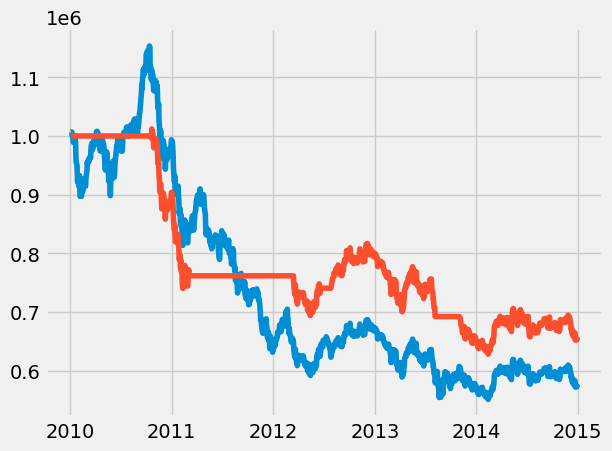

In [ ]:
#Plotting the Balances
plt.plot(price["Bench_Bal"])
plt.plot(price["sys_bal"])
plt.show()

In [ ]:
#calculating strategy metrics
sys_return=round(((price.sys_bal[-1]/price.sys_bal[0])-1)*100,2)
sys_cagr=round((((price.sys_bal[-1]/price.sys_bal[0])**(1/years))-1)*100,2)
print(sys_return)
print(sys_cagr)

-34.34
-8.07


In [ ]:
#System Drawdown
price["sys_peak"]=price.sys_bal.cummax()
price["sys_DD"]=price['sys_bal']-price['sys_peak']
sys_drawdown= round((((price['sys_DD']/price['sys_peak']).min())*100),2)
print(sys_drawdown)

-37.93


In [ ]:
# Sharpe Ratio
price["sys_ret"]=100*(price.Close[-1]/price.Close[0]-1)
price["std"]=price.Close.rolling(window=period).std()
price["Sharpe_Ratio"]=price["sys_ret"]/price["std"]
price

,Open,High,Low,Close,Return,Bench_Bal,fastma,slowma,Long,sys_return,sys_bal,sys_peak,sys_DD,sys_ret,std,Sharpe_Ratio
Date,,,,,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,1.006018,1.006018e+06,NaN,NaN,False,1.000000,1000000.000000,1.000000e+06,0.000000,58.302433,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,1.000142,1.006161e+06,NaN,NaN,False,1.000000,1000000.000000,1.000000e+06,0.000000,58.302433,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,1.000692,1.006857e+06,NaN,NaN,False,1.000000,1000000.000000,1.000000e+06,0.000000,58.302433,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.996460,1.003292e+06,NaN,NaN,False,1.000000,1000000.000000,1.000000e+06,0.000000,58.302433,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.996296,9.995759e+05,NaN,NaN,False,1.000000,1000000.000000,1.000000e+06,0.000000,58.302433,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,8272.049805,8286.400391,8155.250000,8174.100098,0.988159,5.723670e+05,8256.941064,7571.597761,True,0.988159,652345.505705,1.011884e+06,-359538.151419,58.302433,641.905266,0.090827
2014-12-26,8204.799805,8234.549805,8147.950195,8200.700195,0.999500,5.720810e+05,8261.744072,7581.670762,True,0.999500,652019.554821,1.011884e+06,-359864.102303,58.302433,635.832477,0.091695
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,1.003847,5.742817e+05,8269.471064,7591.902012,True,1.003847,654527.688136,1.011884e+06,-357355.968987,58.302433,629.924716,0.092555


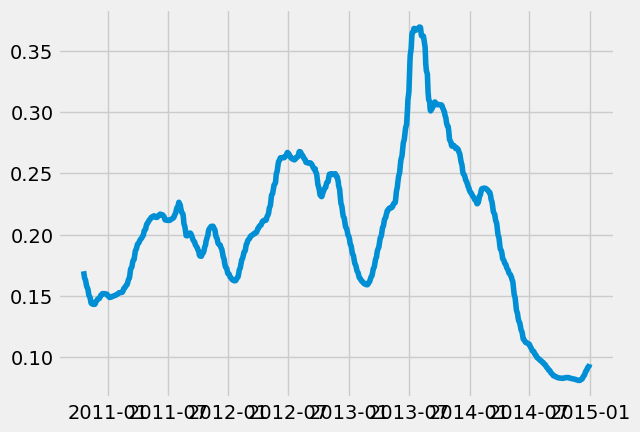

In [ ]:
#plotting the sharpe ratio
plt.plot(price["Sharpe_Ratio"])
